# Libraries

In [153]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.metrics import r2_score

# visualization
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

---
# 3.25 Linear Regression

Fit a line to a data set of observations, and then use the line to predict unobserved values. Simple really.

![linear_regression](https://community.cloudera.com/t5/image/serverpage/image-id/25068iFF075A5AEC3B8528/image-size/medium?v=1.0&px=400)

The regression line are the predicted values, while the blue data points are the observed values.

OLS (ordinary least squares) - minimizes the sum of squared errors; this is a method for performing lin reg.

How to measure how well our line fits our data?
- **R-squared** (coefficient of determination) measures: **The fraction of the total variation in Y that is captured by the model**
- Ranges from 0 to 1
- 0 is bad, 1 is perfect

In [23]:
np.random.seed(0)

pageSpeeds = np.random.normal(3.0, 1.0, 1000)

purchaseAmount = 100 - (pageSpeeds + np.random.normal(0,0.1, 1000)) * 3

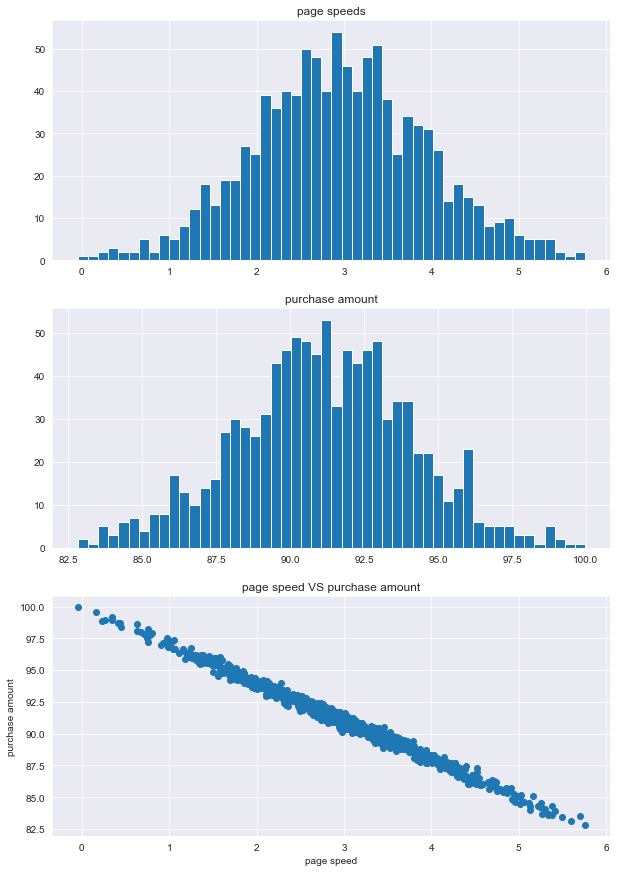

In [42]:
fig, ax = plt.subplots(3, 1, figsize=(10,15))

ax[0].hist(pageSpeeds, bins=50)
ax[0].set_title('page speeds')
ax[1].hist(purchaseAmount, bins=50)
ax[1].set_title('purchase amount')
ax[2].scatter(pageSpeeds, purchaseAmount)
ax[2].set_title('page speed VS purchase amount')
ax[2].set_xlabel('page speed')
ax[2].set_ylabel('purchase amount');

In [45]:
df = pd.DataFrame({'page_speed':pageSpeeds, 'purchase_amount':purchaseAmount})
df

,page_speed,purchase_amount
0,4.764052,85.541054
1,3.400157,89.531786
2,3.978738,88.190480
3,5.240893,84.245906
4,4.867558,85.328910
...,...,...
995,3.412871,89.732062
996,2.801601,91.174740
997,3.094192,90.669893
998,1.852389,94.785403


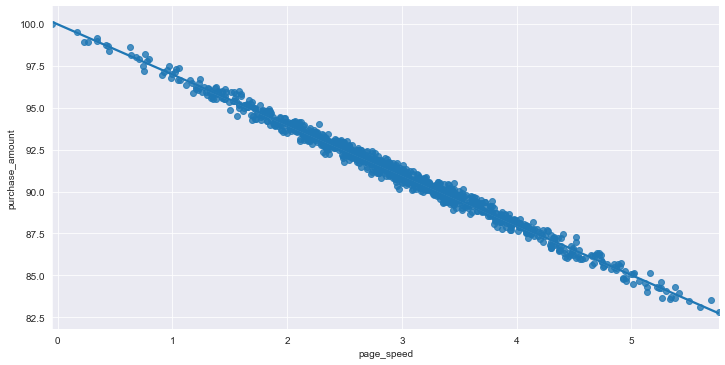

In [62]:
sns.lmplot(data=df, x='page_speed', y='purchase_amount', height=5, aspect=2);

In [84]:
slope, intercept, r_value, p_value, std_err = stats.linregress(pageSpeeds, purchaseAmount)
print(f'slope=    {slope}\nintercept= {intercept}\nr_value=  {r_value})')

slope=    -2.990728259519358
intercept= 99.96851930491009
r_value=  -0.9951991104092175)


R-squared:

In [61]:
r_value ** 2

0.9904212693592979

Let's use the slope and intercept we got from the regression to plot predicted values vs. observed:

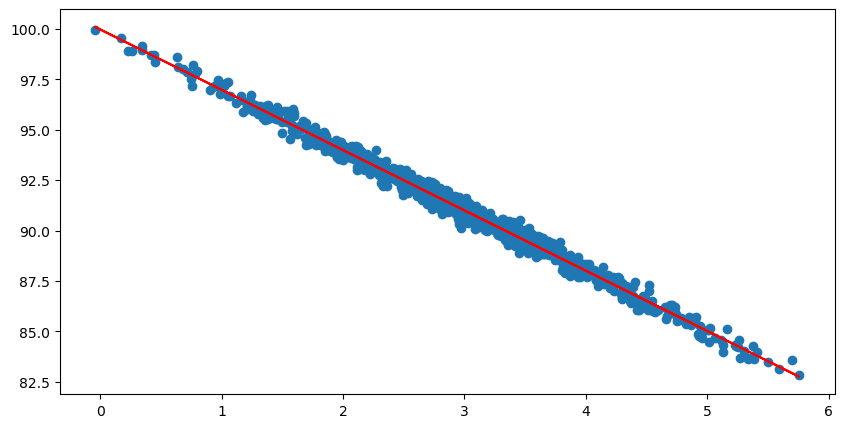

In [91]:
# def predict(x):
#     return slope * x + intercept

# fitLine = predict(pageSpeeds)

fitLine = [slope*x+intercept for x in pageSpeeds]

plt.rcdefaults()

plt.figure(figsize=(10,5))

plt.scatter(pageSpeeds, purchaseAmount)
plt.plot(pageSpeeds, fitLine, color='r');

### Activity Using Tips dataset

Think about breaking this into a separate repo/blog for linear regression. 

Do this section, and let's try redoing project 2 from flatiron.

Load tips data set via seaborn (it returns a pandas dataframe), and let's perform some lin regression

In [94]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [112]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


#### Total bill vs Tip

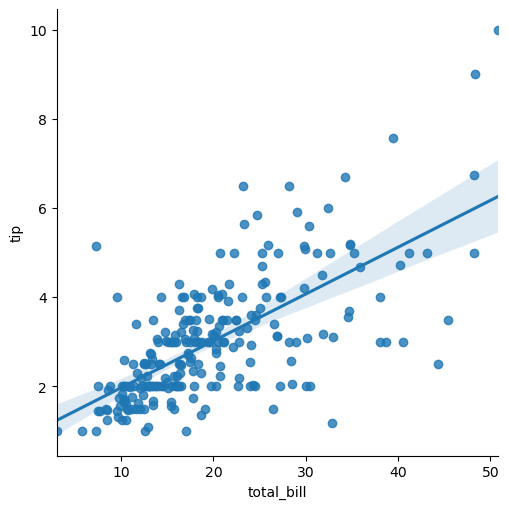

In [113]:
sns.lmplot(data=tips, x='total_bill', y='tip');

In [103]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x=tips.total_bill, y=tips.tip)
slope, intercept, r_value**2

(0.1050245173843534, 0.9202696135546726, 0.4566165863516758)

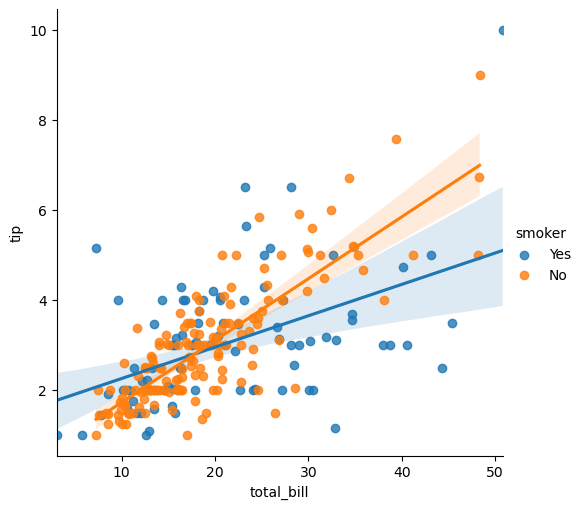

In [99]:
sns.lmplot(data=tips, x='total_bill', y='tip', hue='smoker');

---
# 3.26 Polynomial Regression

- not all relationships are linear
- first order polynomial == linear formula --> $y = mx + b$
- second order polynomial --> $y = ax^2 + bx + c$
- third order polynomial --> $y = ax^3 + bx^2 + cx + d$
- As the order incureases, so does the complexity of the curve
- Too many degrees can lead to overfitting model to training data

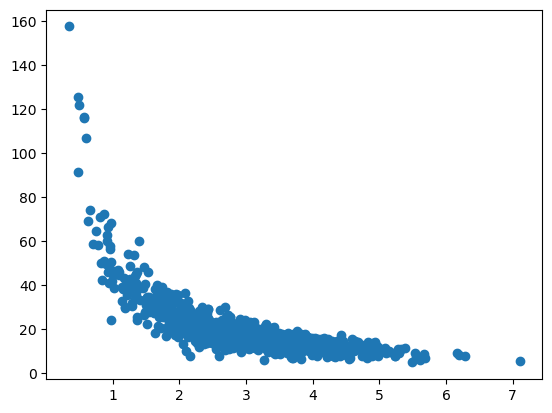

In [138]:
np.random.seed(2)

pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

plt.scatter(pageSpeeds, purchaseAmount);

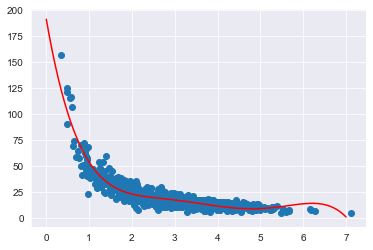

In [185]:
x = np.array(pageSpeeds)
y = np.array(purchaseAmount)

order = 5

polyfit = np.poly1d(np.polyfit(x, y, order))

xp = np.linspace(0, 7, 100)
plt.scatter(x, y)
plt.plot(xp, polyfit(xp), c='r');

In [186]:
r2 = r2_score(y,polyfit(x))
r2

0.8553884386186104

In [184]:
def polyfit(order):
    while order > 1:
        polyfit = np.poly1d(np.polyfit(x,y,order))
        r2 = r2_score(y,polyfit(x))
        print(f'{order} degree polynomial r2: {r2}')
        order -= 1
        
polyfit(4)

4 degree polynomial r2: 0.8293766396303073
3 degree polynomial r2: 0.7842354030823269
2 degree polynomial r2: 0.6927446350535892


Plotting diff functions in diff plots: 

https://towardsdatascience.com/creating-custom-plotting-functions-with-matplotlib-1f4b8eba6aa1

---

# 3.27 Predicting Car Prices

Multiple regression: Multiple independent variables. Example- predicting price of car based on body style, brand, mileage, etc.

Multi**variate** regression: Multiple dependent variables (things you're trying to predict)